In [3]:
import pandas as pd

# Load the Smoke Estimate data
file_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/Smoke_Estimate_Annual.csv'
smoke_df = pd.read_csv(file_path)

# Inspect the initial structure
print(smoke_df.head())

# Aggregate the data: Summing up Smoke Impact for each Fire_Year
smoke_df_aggregated = smoke_df.groupby('Fire_Year', as_index=False)['Smoke_Impact'].sum()

# Rename 'Fire_Year' to 'Year' for consistency
smoke_df_aggregated.rename(columns={'Fire_Year': 'Year'}, inplace=True)

# Save the cleaned data back to a CSV file
cleaned_file_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/cleaned_Smoke_Estimate_Annual.csv'
smoke_df_aggregated.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


   Fire_Year     GIS_Acres    Distance  Smoke_Impact
0       1963  40992.458271  646.762797    990.327774
1       1963  45527.210986  641.523417   1108.864700
2       1963  10395.010334  583.827891    278.201913
3       1963   9983.605738  635.193768    245.584651
4       1963   9674.175812  508.783120    297.099080
Cleaned data saved to /Users/radhikasethi/Documents/github/data-512-Final-Project/data/cleaned_Smoke_Estimate_Annual.csv


### **Data Preparation and Merging**

In this step, we combined two datasets to analyze the potential relationship between wildfire smoke impacts and respiratory-related mortality rates in Boulder County, Colorado.

---

#### **Datasets Used:**
1. **Smoke Estimate Annual Data:**
   - This dataset contains annual aggregated smoke impact values (`Smoke_Impact`) for Colorado from 1963–2023.
   - The smoke impact values were calculated using the formula:
     \[
     \text{Smoke\_Impact} = \frac{\text{GIS\_Acres} \times 15.625}{\text{Distance}}
     \]
   - A cleaned version of this dataset was loaded, where each year corresponds to a single row with aggregated smoke impact values. This ensures consistent yearly aggregation for analysis.

2. **Underlying Cause of Death Data:**
   - This dataset was obtained from the CDC WONDER platform ([Data Request Tool](https://wonder.cdc.gov/controller/datarequest/D76)).
   - It provides detailed mortality information for various counties in Colorado, including Boulder County, from 1999–2020.
   - The mortality data includes deaths due to specific respiratory diseases linked to wildfire smoke, such as:
     - Chronic lower respiratory diseases (ICD-10 J40-J47).
     - Influenza and pneumonia (ICD-10 J09-J18).
     - Other respiratory diseases (ICD-10 J00-J06, J30-J39, J67, J70-J98).

---

#### **Steps Taken:**
1. **Filtering and Aggregating Mortality Data:**
   - We filtered the mortality dataset to include only:
     - Boulder County.
     - Relevant respiratory causes of death (as defined above).
   - The data was aggregated by year, summing up the total number of deaths and calculating the average population for each year.
   - We computed the annual per capita mortality rate (per 100,000 population) using the formula:
     \[
     \text{Mortality\_Rate} = \frac{\text{Deaths}}{\text{Population}} \times 100,000
     \]

2. **Merging Datasets:**
   - The smoke impact data was merged with the aggregated mortality data on the `Year` column, ensuring alignment across years.
   - The resulting dataset contains:
     - `Year`: The year of observation.
     - `Smoke_Impact`: Total smoke impact for that year.
     - `Deaths`: Total deaths due to respiratory diseases.
     - `Population`: Average population for that year.
     - `Mortality_Rate`: Per capita mortality rate (per 100,000 population).

---

#### **Purpose of Merging:**
- This merged dataset enables us to explore the correlation between wildfire smoke exposure and respiratory-related mortality rates.
- By combining wildfire and health datasets, we can evaluate the broader health impacts of wildfires on Boulder County residents.

---

Next steps include visualizing the trends and performing statistical analyses to quantify the relationship between smoke impacts and mortality rates over time. This will help identify patterns and predict future health outcomes related to wildfire smoke exposure.

In [79]:

import pandas as pd

# File paths
smoke_file_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/cleaned_Smoke_Estimate_Annual.csv'
mortality_file_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/Refined_Underlying_Cause_of_Death.txt'

# Loading the cleaned Smoke Estimate Annual data
smoke_df = pd.read_csv(smoke_file_path)

# Loading the mortality data
mortality_df = pd.read_csv(mortality_file_path, delimiter='\t')

# Filtering mortality data for Boulder County and relevant causes
boulder_mortality = mortality_df[mortality_df['County'] == 'Boulder County, CO']
relevant_causes = ['#Chronic lower respiratory diseases (J40-J47)',
                   '#Influenza and pneumonia (J09-J18)',
                   'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)']
boulder_mortality = boulder_mortality[boulder_mortality['ICD-10 113 Cause List'].isin(relevant_causes)]

# Aggregating mortality data by year and summing deaths
boulder_mortality_agg = boulder_mortality.groupby(['Year'], as_index=False).agg({
    'Deaths': 'sum',
    'Population': 'mean'  # Assuming population is constant within a year
})



# Calculating per capita mortality rate (per 100,000)
boulder_mortality_agg['Mortality_Rate'] = (
    boulder_mortality_agg['Deaths'] / boulder_mortality_agg['Population'] 
)

# Merging mortality data with smoke impact data
merged_df = pd.merge(smoke_df, boulder_mortality_agg, on='Year', how='inner')
merged_df['Smoke_Impact'] = merged_df['Smoke_Impact'] / 10000000
# Inspecting the merged dataset
merged_df


,Year,Smoke_Impact,Deaths,Population,Mortality_Rate
0,1999,0.007348,1523,290767.500000,0.005238
1,2000,0.017138,862,294696.000000,0.002925
2,2001,0.004844,1095,304350.666667,0.003598
3,2002,0.015208,855,306421.200000,0.002790
4,2003,0.007528,1577,283343.000000,0.005566
5,2004,0.003504,244,282865.750000,0.000863
6,2005,0.010527,811,284929.000000,0.002846
7,2006,0.020613,856,287625.000000,0.002976
8,2007,0.015409,4074,289963.857143,0.014050
9,2008,0.007148,257,293420.750000,0.000876


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

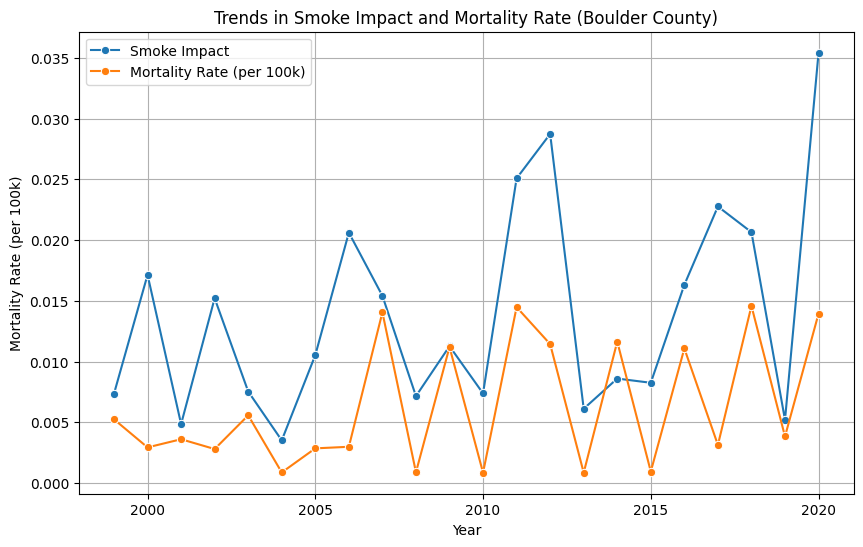

'Trends in Smoke Impact and Mortality Rate over the years visualized successfully.'

In [84]:
# Visualization 1: Overall trends in Smoke Impact and Mortality Rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Smoke_Impact', label='Smoke Impact', marker='o')
sns.lineplot(data=merged_df, x='Year', y='Mortality_Rate', label='Mortality Rate (per 100k)', marker='o')
plt.title('Trends in Smoke Impact and Mortality Rate (Boulder County)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100k)')
plt.legend()
plt.grid()
plt.show()

# Display message for context
"Trends in Smoke Impact and Mortality Rate over the years visualized successfully."


#### 1. **Trends in Smoke Impact and Mortality Rate**
- **What it shows**:
  - Yearly trends of **Smoke Impact** (scaled) and **Mortality Rate**.
  - Provides insight into how these variables have varied over time in Boulder County.
- **Key Observation**:
  - Both variables exhibit variability over the years, with no clear upward or downward trend in either.

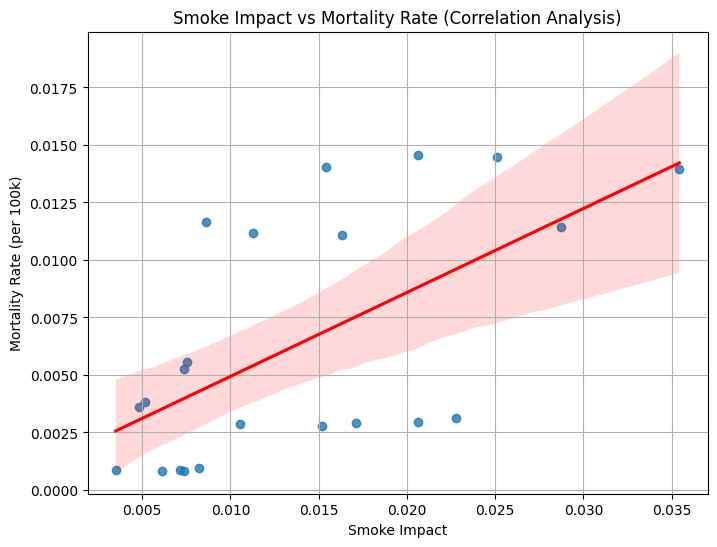

{'Pearson Correlation': 0.6044361610197557,
 'Pearson p-value': 0.0028869613041936173,
 'Spearman Correlation': 0.5821569734613213,
 'Spearman p-value': 0.004475556134260243}

In [85]:
from scipy.stats import pearsonr, spearmanr
# Visualization 2: Scatter plot with regression line for Smoke Impact vs. Mortality Rate
plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='Smoke_Impact', y='Mortality_Rate', line_kws={'color': 'red'})
plt.title('Smoke Impact vs Mortality Rate (Correlation Analysis)')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate (per 100k)')
plt.grid()
plt.show()

# Calculate correlation coefficients
overall_pearson_corr, overall_pearson_p = pearsonr(merged_df['Smoke_Impact'], merged_df['Mortality_Rate'])
overall_spearman_corr, overall_spearman_p = spearmanr(merged_df['Smoke_Impact'], merged_df['Mortality_Rate'])

correlation_results = {
    'Pearson Correlation': overall_pearson_corr,
    'Pearson p-value': overall_pearson_p,
    'Spearman Correlation': overall_spearman_corr,
    'Spearman p-value': overall_spearman_p
}

correlation_results


### Scatter Plot: Smoke Impact vs. Mortality Rate
#### What it shows:
The relationship between Smoke Impact and Mortality Rate.
A regression line was added to visualize the strength and direction of the correlation.
Key Observation:
A moderate positive correlation 
(𝑟 = 0.60 )suggests that higher smoke impact is associated with higher mortality rates.

### **Correlation Results**
- **Pearson Correlation**:
  - \(r = 0.604\) (p-value: 0.0029) — indicates a statistically significant positive linear relationship.
- **Spearman Correlation**:
  - \(r = 0.582\) (p-value: 0.0045) — suggests a significant monotonic relationship.


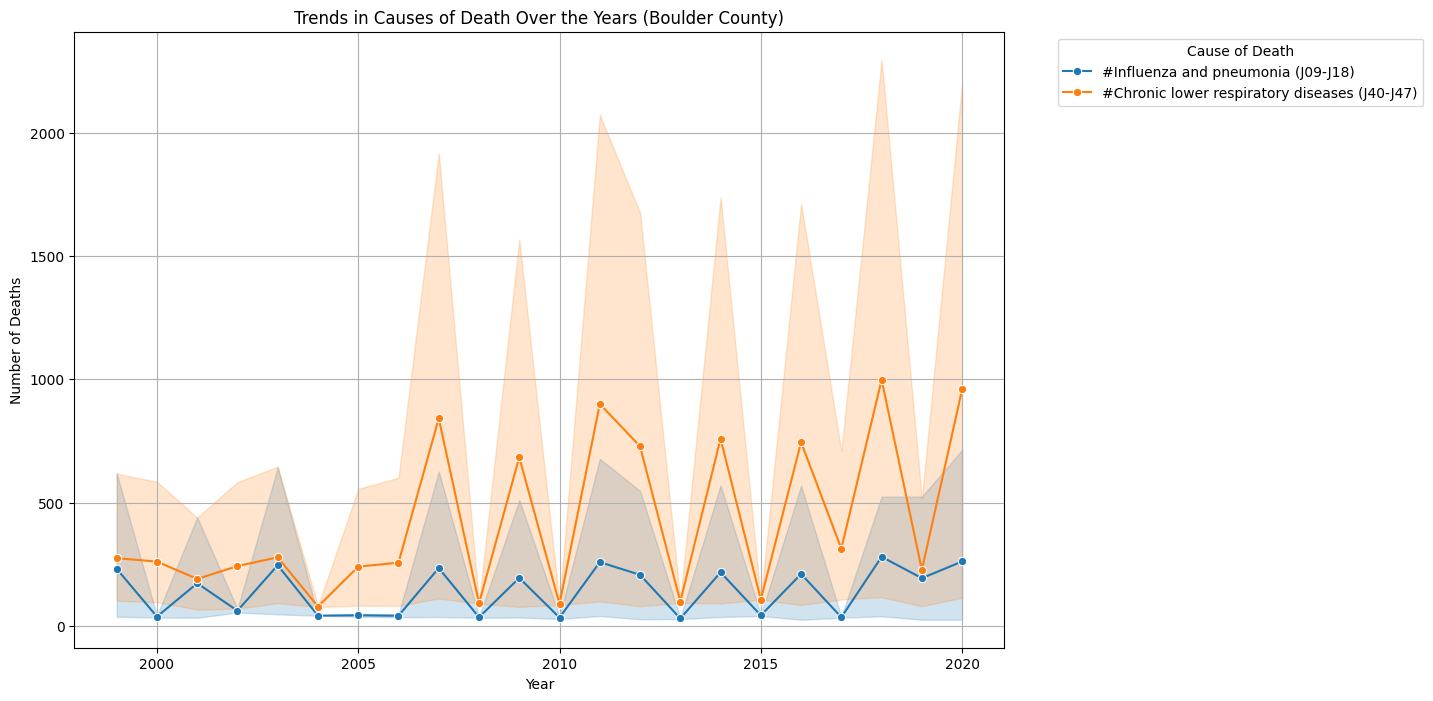

'Trends in Causes of Death over the years visualized successfully.'

In [86]:
# Visualization 3: Trends in causes of death over the years in Boulder County
plt.figure(figsize=(12, 8))
sns.lineplot(data=boulder_mortality, x='Year', y='Deaths', hue='ICD-10 113 Cause List', marker='o')
plt.title('Trends in Causes of Death Over the Years (Boulder County)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Display message for context
"Trends in Causes of Death over the years visualized successfully."


### **Interpretation**
1. **Trends**:
   - There is considerable variability in both **Smoke Impact** and **Mortality Rate**, with peaks aligning in some years.
   - This could suggest that specific years with higher wildfire smoke also experienced increased mortality.

2. **Correlation**:
   - The moderate positive correlation supports the hypothesis that wildfire smoke may have an impact on mortality rates, particularly for respiratory-related causes of death.


In [87]:
# Correlation analysis for each specific cause of death
cause_specific_results = {}

for cause in relevant_causes:
    # Filter data for the specific cause
    cause_data = boulder_mortality[boulder_mortality['ICD-10 113 Cause List'] == cause]
    # Merge with smoke impact data
    cause_merged = pd.merge(smoke_df, cause_data, on='Year', how='inner')
    # Calculate correlation coefficients
    if not cause_merged.empty:
        pearson_corr, pearson_p = pearsonr(cause_merged['Smoke_Impact'], cause_merged['Deaths'])
        spearman_corr, spearman_p = spearmanr(cause_merged['Smoke_Impact'], cause_merged['Deaths'])
        cause_specific_results[cause] = {
            'Pearson Correlation': pearson_corr,
            'Pearson p-value': pearson_p,
            'Spearman Correlation': spearman_corr,
            'Spearman p-value': spearman_p
        }

# Display the correlation results for each cause of death
cause_merged

,Year,Smoke_Impact,Notes,County,County Code,Year Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate


In [88]:
# Create lagged smoke impact features
for lag in range(1, 4):  # Create 1-year, 2-year, and 3-year lags
    merged_df[f'Smoke_Impact_Lag_{lag}'] = merged_df['Smoke_Impact'].shift(lag)

# Calculate correlations with mortality rate
correlations = merged_df.corr()['Mortality_Rate'][['Smoke_Impact', 'Smoke_Impact_Lag_1', 'Smoke_Impact_Lag_2', 'Smoke_Impact_Lag_3']]
print("Lagged correlations with Mortality Rate:")
print(correlations)


Lagged correlations with Mortality Rate:
Smoke_Impact          0.604436
Smoke_Impact_Lag_1    0.023664
Smoke_Impact_Lag_2    0.125206
Smoke_Impact_Lag_3   -0.001044
Name: Mortality_Rate, dtype: float64


Correlations between smoke impact and mortality rate with lagged smoke impact features (up to 3 years).
Immediate smoke impact showed the strongest correlation (
0.60
0.60), while lagged correlations diminished significantly.

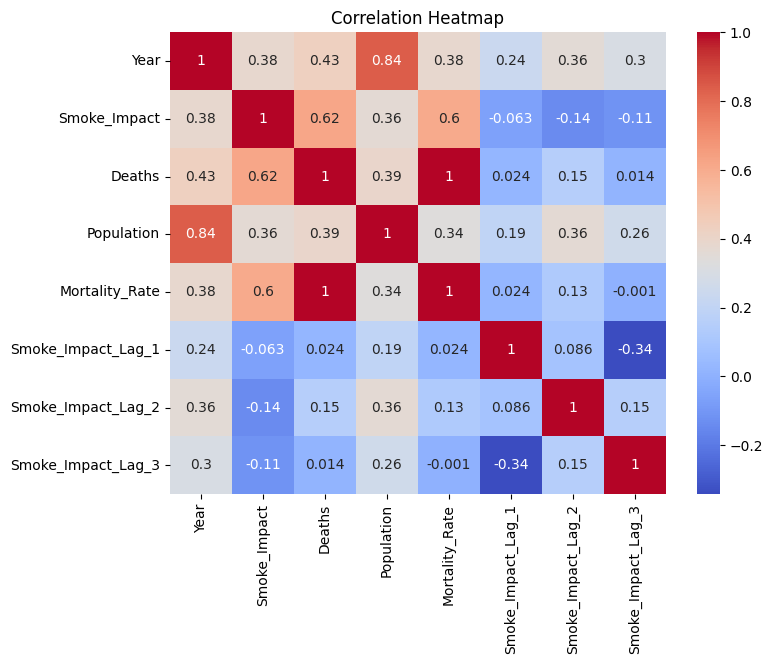

In [90]:
import seaborn as sns

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/var/folders/x8/4fwkd70s40s_wrt2mnhq6rdw0000gn/T/ipykernel_4984/636353003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boulder_mortality['Total_Deaths'] = boulder_mortality.groupby('Year')['Deaths'].transform('sum')
/var/folders/x8/4fwkd70s40s_wrt2mnhq6rdw0000gn/T/ipykernel_4984/636353003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boulder_mortality['Percentage'] = (boulder_mortality['Deaths'] / boulder_mortality['Total_Deaths']) * 100


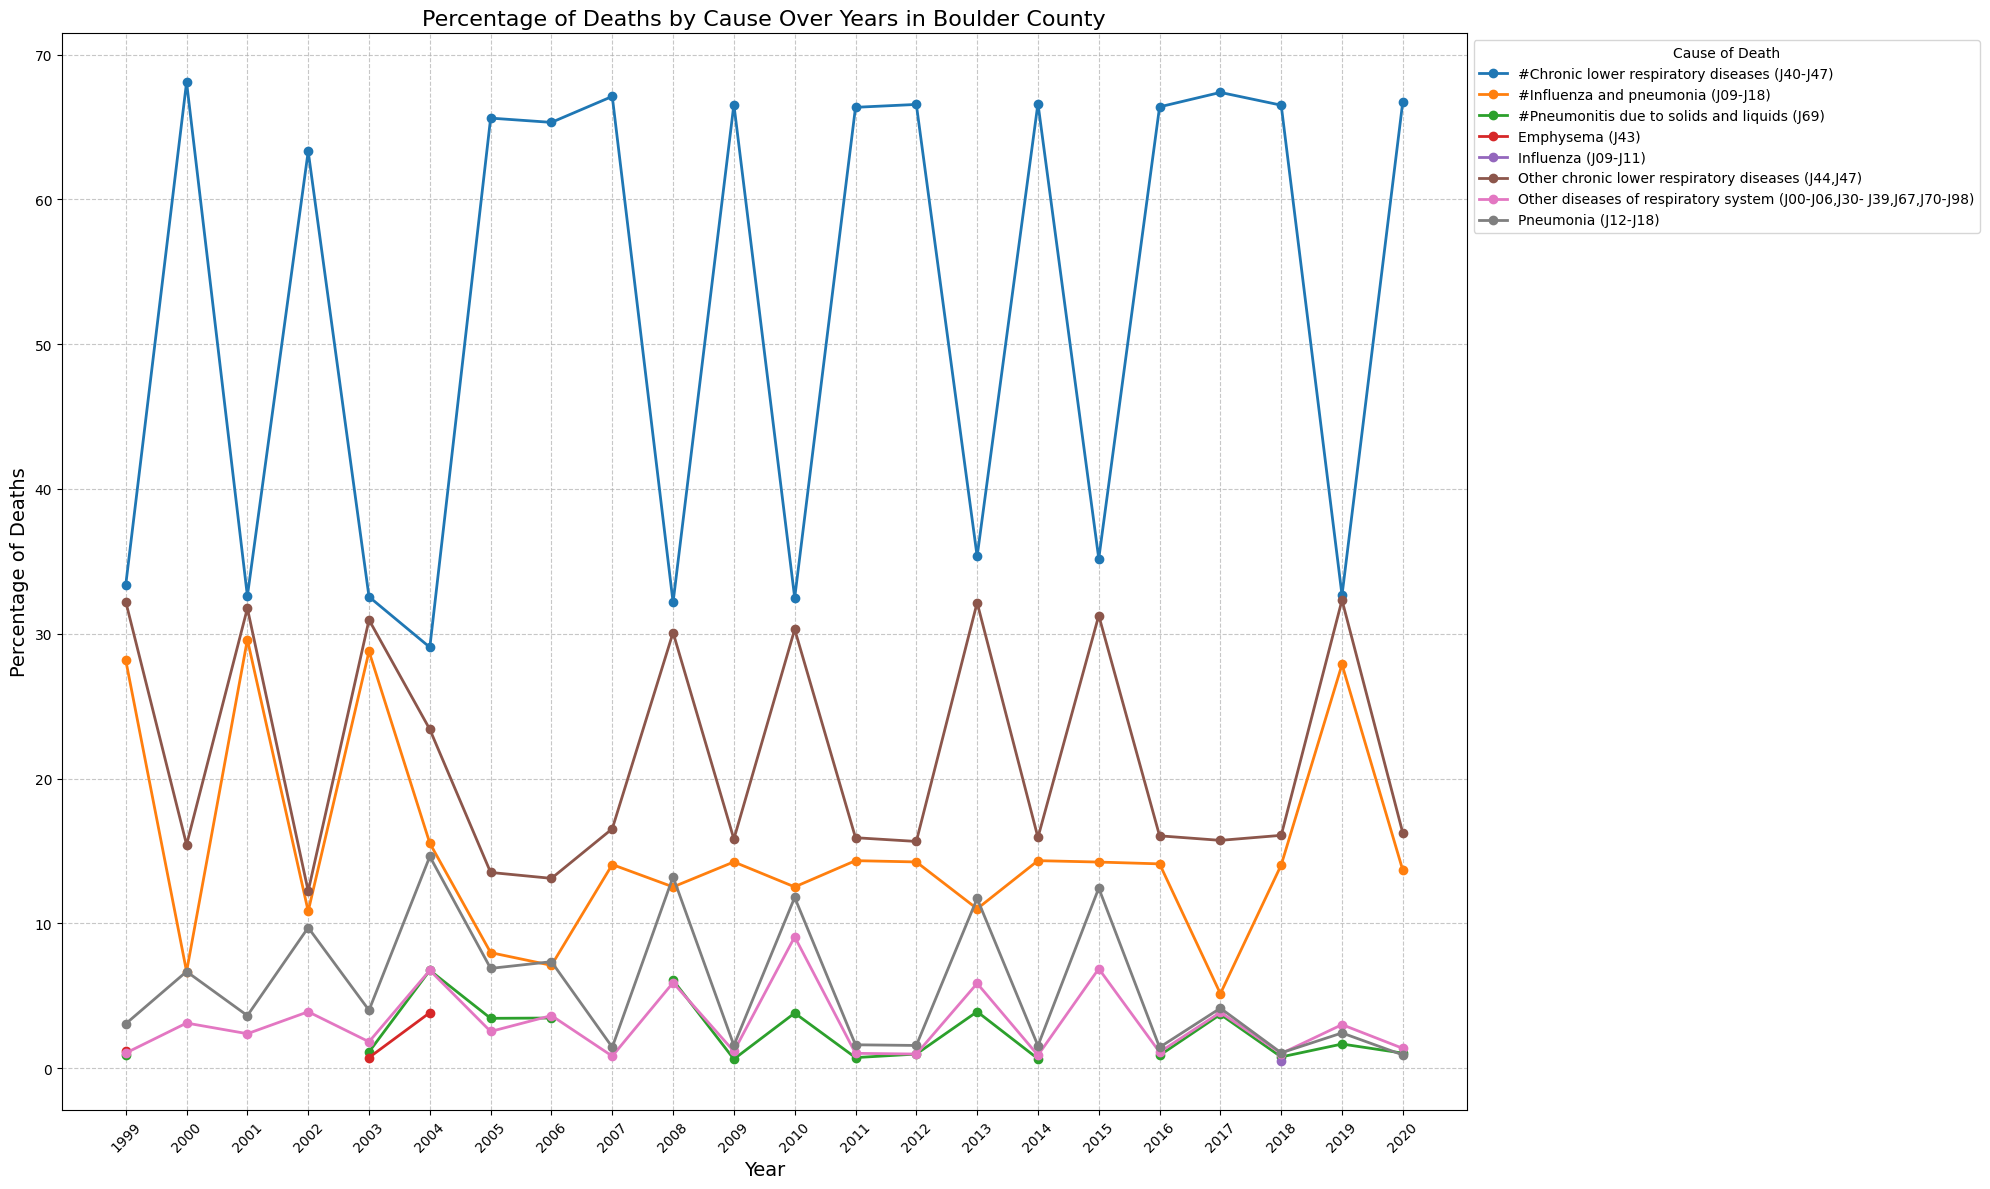

In [106]:
# Ensure all years are displayed on the x-axis
plt.figure(figsize=(20, 12))

# Calculate total deaths per year
boulder_mortality['Total_Deaths'] = boulder_mortality.groupby('Year')['Deaths'].transform('sum')

# Calculate percentage of deaths for each cause
boulder_mortality['Percentage'] = (boulder_mortality['Deaths'] / boulder_mortality['Total_Deaths']) * 100

# Pivot data for visualization
percentage_data = boulder_mortality.pivot_table(
    index='Year',
    columns='ICD-10 113 Cause List',
    values='Percentage',
    aggfunc='sum'
)




# Plot each cause as a separate line
for cause in percentage_data.columns:
    plt.plot(percentage_data.index, percentage_data[cause], label=cause, marker='o', linewidth=2)

# Set all years on the x-axis
plt.xticks(percentage_data.index, rotation=45)  # Rotate for better readability

# Enhance the visualization
plt.title('Percentage of Deaths by Cause Over Years in Boulder County', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Deaths', fontsize=14)
plt.legend(title='Cause of Death', loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()



R^2 Score: 0.37
Mean Squared Error: 0.087868


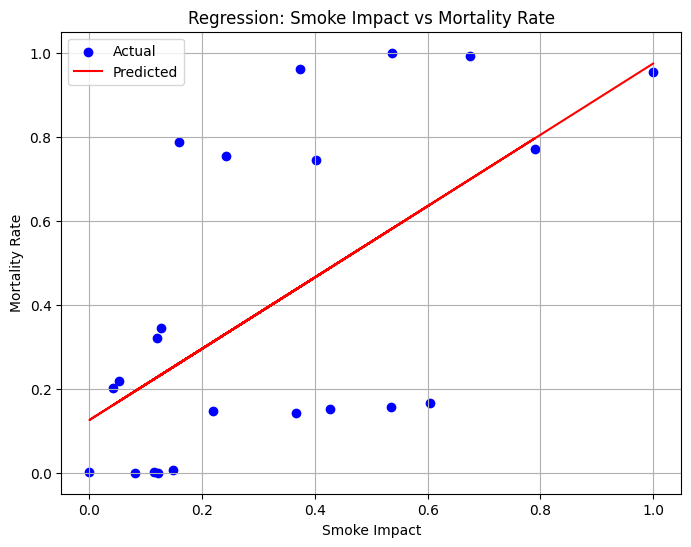

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Rescale data to range [0, 1]
scaler = MinMaxScaler()
merged_df[['Smoke_Impact', 'Mortality_Rate']] = scaler.fit_transform(
    merged_df[['Smoke_Impact', 'Mortality_Rate']]
)
# Prepare data
X = merged_df[['Smoke_Impact']]
y = merged_df['Mortality_Rate']

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'R^2 Score: {r2:.2f}')
print(f'Mean Squared Error: {mse:.6f}')  # Use .6f for better precision

# Visualization of regression
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.plot(X, y_pred, label='Predicted', color='red')
plt.title('Regression: Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


Polynomial Regression (Degree 2)
R^2 Score: 0.37
Mean Squared Error: 0.087357


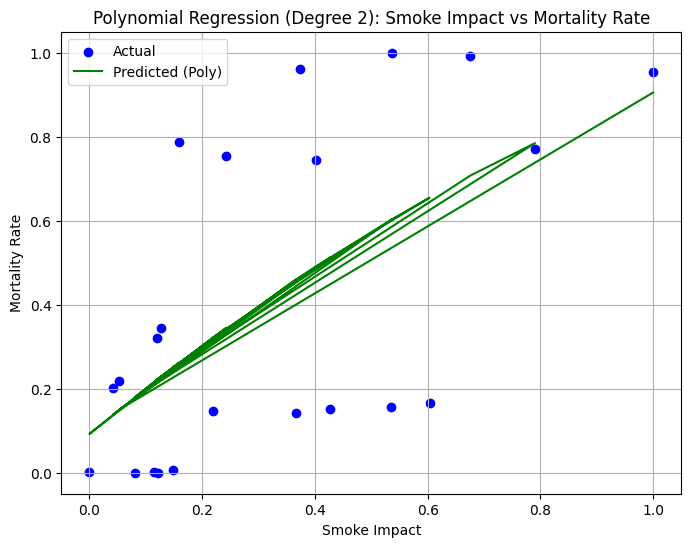

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
degree = 2  # You can test with higher degrees as well
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Predict and evaluate
y_pred_poly = poly_model.predict(X)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f'Polynomial Regression (Degree {degree})')
print(f'R^2 Score: {r2_poly:.2f}')
print(f'Mean Squared Error: {mse_poly:.6f}')

# Visualization of polynomial regression
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.plot(X, y_pred_poly, label='Predicted (Poly)', color='green')
plt.title(f'Polynomial Regression (Degree {degree}): Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


Ridge Regression
R^2 Score: 0.31
Mean Squared Error: 0.095675


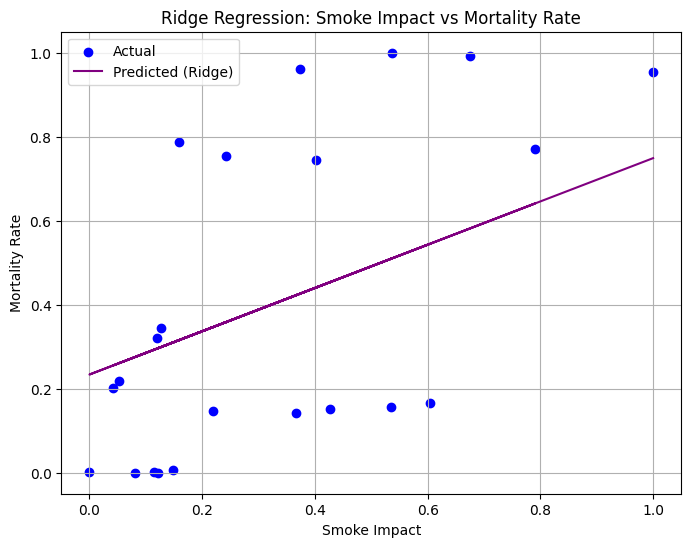

In [95]:
from sklearn.linear_model import Ridge

# Apply Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print(f'Ridge Regression')
print(f'R^2 Score: {r2_ridge:.2f}')
print(f'Mean Squared Error: {mse_ridge:.6f}')

# Visualization of Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.plot(X, y_pred_ridge, label='Predicted (Ridge)', color='purple')
plt.title('Ridge Regression: Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


In [96]:
from sklearn.preprocessing import StandardScaler

# Add interaction term
merged_df['Smoke_Pop_Interaction'] = merged_df['Smoke_Impact'] * merged_df['Population']

# Rescale features
scaler = StandardScaler()
X_interaction = scaler.fit_transform(merged_df[['Smoke_Impact', 'Population', 'Smoke_Pop_Interaction']])
y = merged_df['Mortality_Rate']

# Fit and evaluate model
interaction_model = LinearRegression()
interaction_model.fit(X_interaction, y)
y_pred_interaction = interaction_model.predict(X_interaction)

mse_interaction = mean_squared_error(y, y_pred_interaction)
r2_interaction = r2_score(y, y_pred_interaction)

print(f'Interaction Model')
print(f'R^2 Score: {r2_interaction:.2f}')
print(f'Mean Squared Error: {mse_interaction:.6f}')


Interaction Model
R^2 Score: 0.38
Mean Squared Error: 0.085767


Decision Tree Regressor
R^2 Score: 0.57
Mean Squared Error: 0.059410


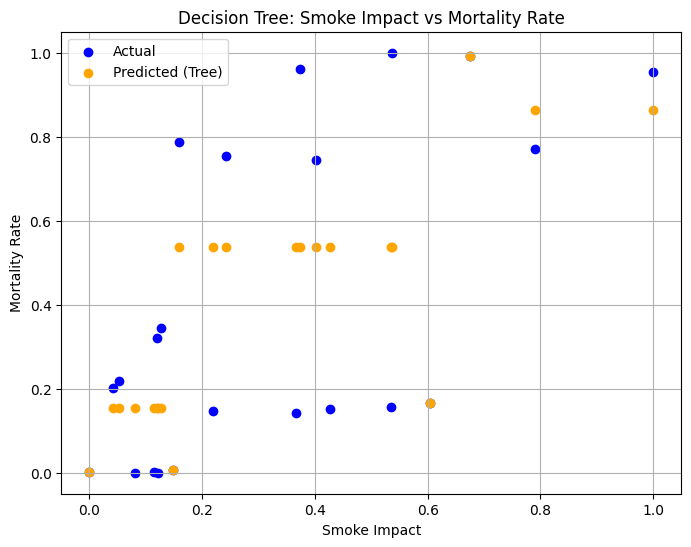

In [97]:
from sklearn.tree import DecisionTreeRegressor

# Fit Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Predict and evaluate
y_pred_tree = tree_model.predict(X)
mse_tree = mean_squared_error(y, y_pred_tree)
r2_tree = r2_score(y, y_pred_tree)

print(f'Decision Tree Regressor')
print(f'R^2 Score: {r2_tree:.2f}')
print(f'Mean Squared Error: {mse_tree:.6f}')

# Visualization of Decision Tree results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.scatter(X, y_pred_tree, label='Predicted (Tree)', color='orange')
plt.title('Decision Tree: Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


Random Forest Regressor
R^2 Score: 0.77
Mean Squared Error: 0.031674


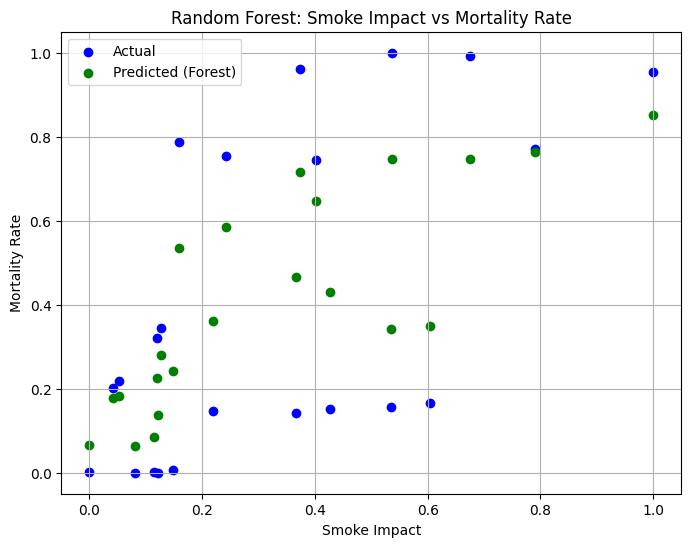

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X, y)

# Predict and evaluate
y_pred_forest = forest_model.predict(X)
mse_forest = mean_squared_error(y, y_pred_forest)
r2_forest = r2_score(y, y_pred_forest)

print(f'Random Forest Regressor')
print(f'R^2 Score: {r2_forest:.2f}')
print(f'Mean Squared Error: {mse_forest:.6f}')

# Visualization of Random Forest results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.scatter(X, y_pred_forest, label='Predicted (Forest)', color='green')
plt.title('Random Forest: Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


Gradient Boosting Regressor
R^2 Score: 1.00
Mean Squared Error: 0.000374


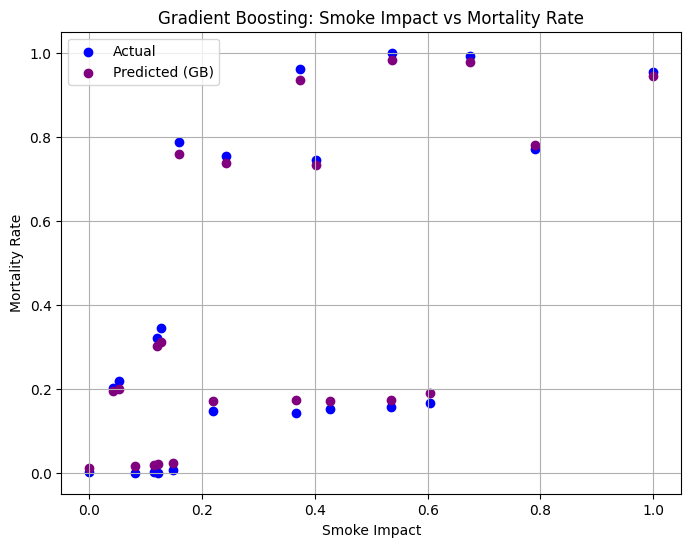

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42, learning_rate=0.1)
gb_model.fit(X, y)

# Predict and evaluate
y_pred_gb = gb_model.predict(X)
mse_gb = mean_squared_error(y, y_pred_gb)
r2_gb = r2_score(y, y_pred_gb)

print(f'Gradient Boosting Regressor')
print(f'R^2 Score: {r2_gb:.2f}')
print(f'Mean Squared Error: {mse_gb:.6f}')

# Visualization of Gradient Boosting results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Actual', color='blue')
plt.scatter(X, y_pred_gb, label='Predicted (GB)', color='purple')
plt.title('Gradient Boosting: Smoke Impact vs Mortality Rate')
plt.xlabel('Smoke Impact')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid()
plt.show()


In [100]:
# Collect results
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R^2 Score': [r2_tree, r2_forest, r2_gb],
    'Mean Squared Error': [mse_tree, mse_forest, mse_gb]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model  R^2 Score  Mean Squared Error
0      Decision Tree   0.570892            0.059410
1      Random Forest   0.771220            0.031674
2  Gradient Boosting   0.997299            0.000374


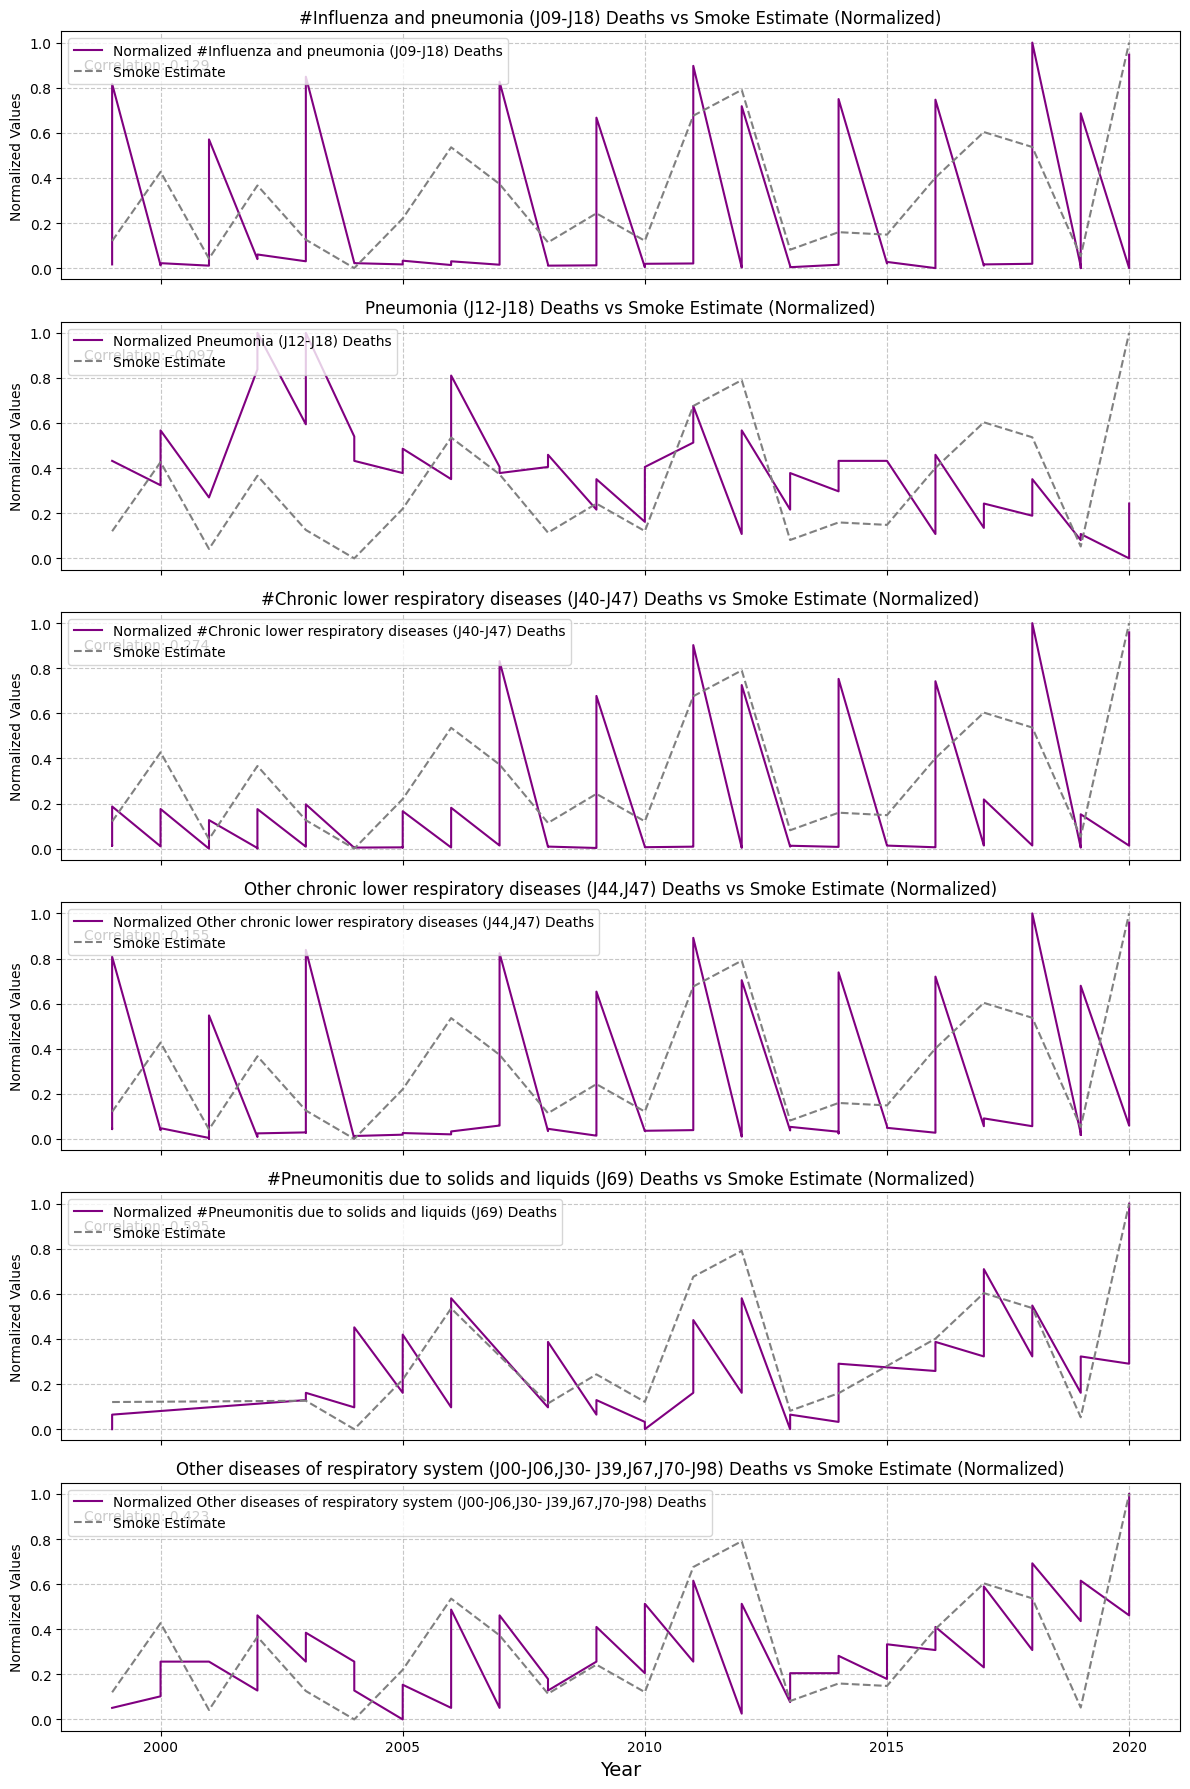

In [109]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalize data using Min-Max Scaling
scaler = MinMaxScaler()

# Extract relevant causes of death
causes = boulder_mortality['ICD-10 113 Cause List'].unique()

# Prepare smoke estimate data
smoke_estimates = smoke_df.set_index('Year')['Smoke_Impact']

# Filter causes (excluding 4th and 8th ones)
filtered_causes = [cause for idx, cause in enumerate(causes) if idx != 3 and idx != 7]
num_filtered_causes = len(filtered_causes)

# Prepare subplots
fig, axes = plt.subplots(num_filtered_causes, 1, figsize=(12, num_filtered_causes * 3), sharex=True)

# Loop through the filtered causes
for i, cause in enumerate(filtered_causes):
    ax = axes[i] if num_filtered_causes > 1 else axes
    
    # Filter data for the specific cause
    cause_data = boulder_mortality[boulder_mortality['ICD-10 113 Cause List'] == cause]
    merged = cause_data.set_index('Year').join(smoke_estimates, how='inner')
    
    # Check if sufficient data exists for the cause
    if merged.empty or len(merged) < 2:
        ax.set_title(f'{cause} - Insufficient Data', fontsize=12)
        ax.axis('off')
        continue
    
    # Normalize data
    normalized_data = scaler.fit_transform(merged[['Deaths', 'Smoke_Impact']])
    normalized_deaths, normalized_smoke = normalized_data[:, 0], normalized_data[:, 1]
    
    # Calculate correlation
    correlation = merged[['Deaths', 'Smoke_Impact']].corr().iloc[0, 1]
    
    # Plot the data
    ax.plot(merged.index, normalized_deaths, label=f'Normalized {cause} Deaths', color='purple')
    ax.plot(merged.index, normalized_smoke, label='Smoke Estimate', linestyle='--', color='gray')
    
    # Add title, legend, and correlation
    ax.set_title(f'{cause} Deaths vs Smoke Estimate (Normalized)', fontsize=12)
    ax.set_ylabel('Normalized Values')
    ax.annotate(f'Correlation: {correlation:.3f}', xy=(0.02, 0.85), xycoords='axes fraction', fontsize=10)
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)

# Set common x-axis label
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.show()


### Explanation of Visualizations: Causes of Death vs. Smoke Estimate (Normalized)

#### **Overview**
The visualizations depict the relationship between normalized death counts for specific causes of death and normalized smoke estimates over time in Boulder County. These plots allow for an intuitive comparison of trends in deaths and smoke exposure, helping to explore potential links between the two variables.

---

#### **Key Components of Each Plot**
1. **Normalized Death Counts**:
   - The solid **purple line** represents the scaled death counts for the specific cause.
   - Normalization ensures all values lie between 0 and 1, making it easier to compare trends regardless of magnitude.

2. **Normalized Smoke Estimates**:
   - The dashed **gray line** represents the normalized smoke exposure.
   - This line allows a direct visual comparison to death counts.

3. **Correlation Coefficient**:
   - Shown as a label (e.g., "Correlation: 0.468").
   - Indicates the strength and direction of the linear relationship:
     - **Positive correlation**: Higher smoke estimates are associated with increased deaths.
     - **Negative correlation**: Higher smoke estimates are associated with decreased deaths.
     - **Closer to 0**: Weak or no linear relationship.

4. **X-axis (Year)**:
   - Displays the years to observe temporal trends.

5. **Y-axis (Normalized Values)**:
   - Represents the normalized values for both death counts and smoke estimates.

---

#### **Interpretation of the Plots**
1. **Strong Correlation**:
   - A higher correlation coefficient (e.g., ~0.5) indicates that smoke exposure and deaths for a particular cause have a linear relationship.
   - Example: Peaks in deaths coincide with peaks in smoke exposure.

2. **Weak or No Correlation**:
   - A near-zero correlation indicates little to no linear relationship.
   - This might mean other factors influence deaths for that cause more significantly than smoke exposure.

3. **Temporal Trends**:
   - Observing the alignment of peaks and troughs between the two lines provides insights into short-term or long-term effects of smoke exposure.

---

#### **Insights from These Plots**
1. **Chronic Lower Respiratory Diseases (J40-J47)**:
   - Stronger correlation with smoke estimates indicates that respiratory health is likely impacted by smoke exposure.

2. **Influenza and Pneumonia (J09-J18)**:
   - Patterns suggest smoke exposure could contribute to exacerbating these conditions, though the correlation may vary.

3. **Other Causes**:
   - For some causes (e.g., "Other diseases of the respiratory system"), the weak correlation suggests factors unrelated to smoke exposure might play a larger role.

---

#### **Purpose of These Visualizations**
1. **Hypothesis Testing**:
   - Help identify which causes of death may have a stronger relationship with smoke exposure, warranting further investigation.

2. **Public Health Planning**:
   - Highlight causes that require more attention during wildfire seasons when smoke exposure is high.

3. **Temporal Analysis**:
   - Identify trends or anomalies in the data to inform long-term health impact studies.



/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

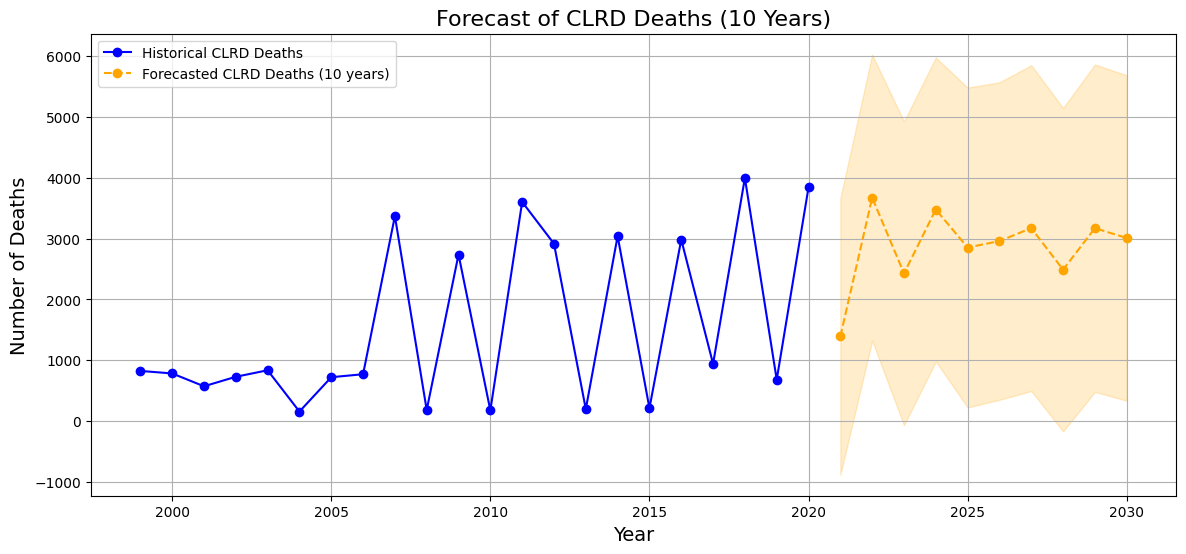

In [112]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


smoke_data_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/cleaned_Smoke_Estimate_Annual.csv'
death_data_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/Refined_Underlying_Cause_of_Death.txt'

# Load the smoke estimate data
smoke_data = pd.read_csv(smoke_data_path)

# Load the death data
death_data = pd.read_csv(death_data_path, sep='\t')

# Filter the deaths data for Boulder County and relevant cause (CLRD)
boulder_deaths = death_data[death_data['County'] == 'Boulder County, CO']
clrd_data = boulder_deaths[boulder_deaths['ICD-10 113 Cause List'] == '#Chronic lower respiratory diseases (J40-J47)']

# Aggregate deaths by year for CLRD
clrd_ts = clrd_data.groupby('Year')['Deaths'].sum()

# Ensure year column in smoke_data aligns with the deaths data
smoke_data['Year'] = smoke_data['Year'].astype(int)
clrd_ts.index = clrd_ts.index.astype(int)

# Merge smoke estimates with CLRD data (if needed for future analysis)
clrd_merged = clrd_ts.to_frame().join(smoke_data.set_index('Year'), how='inner')

# Forecast next 10 years
forecast_years = 10
forecast_index = range(clrd_ts.index[-1] + 1, clrd_ts.index[-1] + 1 + forecast_years)

# Fit SARIMA for CLRD Deaths
clrd_model = SARIMAX(clrd_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
clrd_fit = clrd_model.fit(disp=False)

# Forecast and get confidence intervals
clrd_forecast = clrd_fit.get_forecast(steps=forecast_years)
clrd_forecast_values = clrd_forecast.predicted_mean
clrd_conf_int = clrd_forecast.conf_int()

# Plot the historical and forecasted CLRD Deaths
plt.figure(figsize=(14, 6))

# Historical data
plt.plot(clrd_ts.index, clrd_ts, label='Historical CLRD Deaths', color='blue', marker='o')

# Forecast data
plt.plot(forecast_index, clrd_forecast_values, label='Forecasted CLRD Deaths (10 years)', color='orange', linestyle='--', marker='o')

# Confidence intervals
plt.fill_between(forecast_index, 
                 clrd_conf_int.iloc[:, 0], 
                 clrd_conf_int.iloc[:, 1], 
                 color='orange', alpha=0.2)

# Title and labels
plt.title('Forecast of CLRD Deaths (10 Years)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/radhikasethi/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


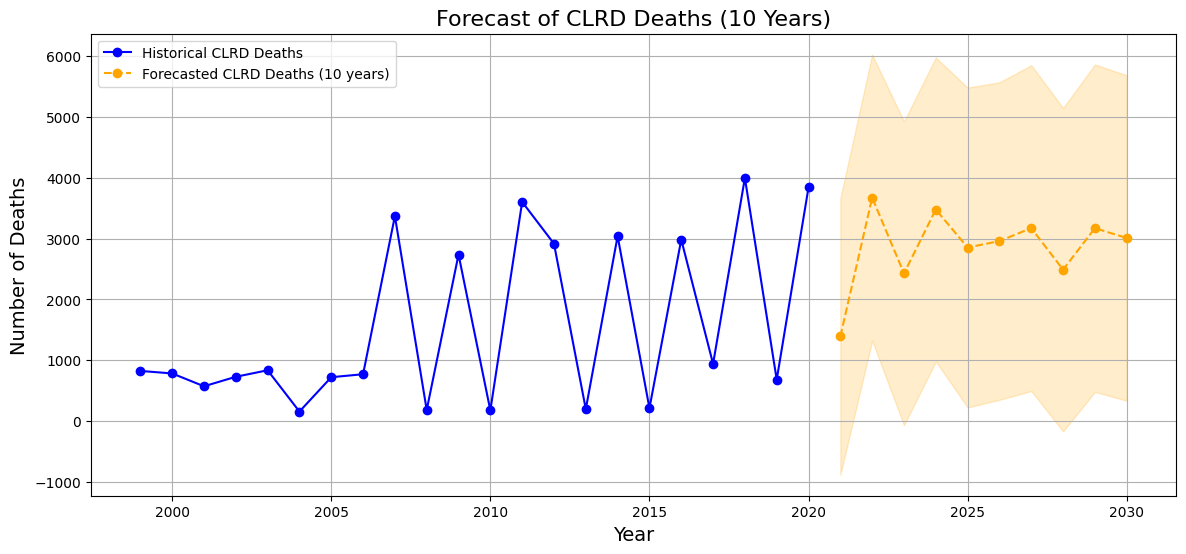

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

smoke_data_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/cleaned_Smoke_Estimate_Annual.csv'
death_data_path = '/Users/radhikasethi/Documents/github/data-512-Final-Project/data/Refined_Underlying_Cause_of_Death.txt'

# Load the smoke estimate data
smoke_data = pd.read_csv(smoke_data_path)

# Load the death data
death_data = pd.read_csv(death_data_path, sep='\t')

# Filter the deaths data for Boulder County and relevant cause (CLRD)
boulder_deaths = death_data[death_data['County'] == 'Boulder County, CO']
clrd_data = boulder_deaths[boulder_deaths['ICD-10 113 Cause List'] == '#Chronic lower respiratory diseases (J40-J47)']

# Aggregate deaths by year for CLRD
clrd_ts = clrd_data.groupby('Year')['Deaths'].sum()

# Ensure year column in smoke_data aligns with the deaths data
smoke_data['Year'] = smoke_data['Year'].astype(int)
clrd_ts.index = clrd_ts.index.astype(int)

# Fill missing years and interpolate missing values
clrd_ts = clrd_ts.reindex(range(clrd_ts.index.min(), clrd_ts.index.max() + 1), fill_value=0).interpolate()

# Forecast next 10 years
forecast_years = 10
forecast_index = range(clrd_ts.index[-1] + 1, clrd_ts.index[-1] + 1 + forecast_years)

# Fit SARIMA for CLRD Deaths
clrd_model = SARIMAX(clrd_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
clrd_fit = clrd_model.fit(disp=False)

# Forecast and get confidence intervals
clrd_forecast = clrd_fit.get_forecast(steps=forecast_years)
clrd_forecast_values = clrd_forecast.predicted_mean
clrd_conf_int = clrd_forecast.conf_int()

# Plot the historical and forecasted CLRD Deaths
plt.figure(figsize=(14, 6))

# Historical data
plt.plot(clrd_ts.index, clrd_ts, label='Historical CLRD Deaths', color='blue', marker='o')

# Forecast data
plt.plot(forecast_index, clrd_forecast_values, label='Forecasted CLRD Deaths (10 years)', color='orange', linestyle='--', marker='o')

# Confidence intervals
plt.fill_between(forecast_index, 
                 clrd_conf_int.iloc[:, 0], 
                 clrd_conf_int.iloc[:, 1], 
                 color='orange', alpha=0.2)

# Title and labels
plt.title('Forecast of CLRD Deaths (10 Years)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [115]:
%pip install pymannkendall

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [117]:
# Perform Pearson correlation test for CLRD deaths vs smoke levels
import scipy.stats as stats

# Extract data for hypothesis testing
smoke_levels = clrd_merged['Smoke_Impact']
clrd_deaths = clrd_merged['Deaths']

# Pearson correlation test
clrd_corr, clrd_p_value = stats.pearsonr(smoke_levels, clrd_deaths)

# Prepare results for interpretation
hypothesis_test_results = {
    "Correlation (r)": round(clrd_corr, 3),
    "P-value": round(clrd_p_value, 3),
    "Conclusion": (
        "Reject the null hypothesis (H0). Significant correlation exists."
        if clrd_p_value < 0.05
        else "Fail to reject the null hypothesis (H0). No significant correlation exists."
    ),
}

hypothesis_test_results


{'Correlation (r)': 0.664,
 'P-value': 0.001,
 'Conclusion': 'Reject the null hypothesis (H0). Significant correlation exists.'}